In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [5]:
def polynomial_dataframe(feature_col,degree):
    new_frame=pd.DataFrame()
    new_frame['pwr_1']=feature_col
    if degree>1:
        for i in range(2,degree+1):
            col_name=str(i)
            new_frame[col_name]=feature_col**i
    return new_frame

In [7]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [14]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [15]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


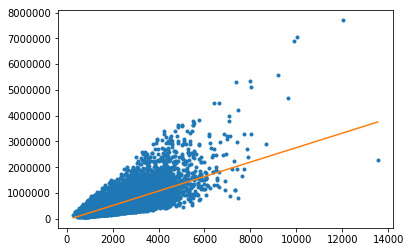

In [58]:
poly1_data=polynomial_dataframe(sales['sqft_living'],1)
poly1_data['price']=sales['price']
model1=linear_model.LinearRegression()
model1.fit(poly1_data[['pwr_1']],poly1_data[['price']])
model1.predict(poly1_data[['pwr_1']].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['pwr_1'],poly1_data['price'],'.',
poly1_data[['pwr_1']], model1.predict(poly1_data[['pwr_1']]),'-')

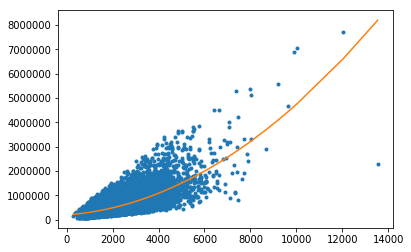

In [65]:
poly2_data=polynomial_dataframe(sales['sqft_living'],2)
poly2_data['price']=sales['price']
model2=linear_model.LinearRegression()
model2.fit(poly2_data[['pwr_1']+['2']],poly2_data[['price']])
model2.predict(poly2_data[['pwr_1']+['2']].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly2_data['pwr_1'],poly2_data['price'],'.',
poly2_data[['pwr_1']], model2.predict(poly2_data[['pwr_1']+['2']]),'-')

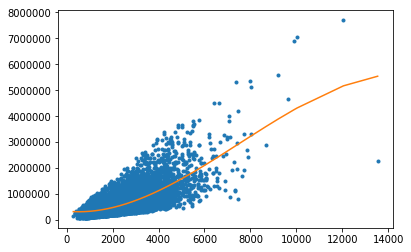

In [67]:
poly3_data=polynomial_dataframe(sales['sqft_living'],3)
poly3_data['price']=sales['price']
model3=linear_model.LinearRegression()
model3.fit(poly3_data[['pwr_1']+['2']+['3']],poly3_data[['price']])
model3.predict(poly3_data[['pwr_1']+['2']+['3']].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly3_data['pwr_1'],poly3_data['price'],'.',
poly3_data[['pwr_1']], model3.predict(poly3_data[['pwr_1']+['2']+['3']]),'-')

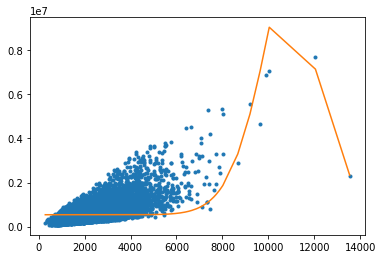

In [71]:
poly15_data=polynomial_dataframe(sales['sqft_living'],15)
feat=poly15_data.columns
poly15_data['price']=sales['price']
model15=linear_model.LinearRegression()
model15.fit(poly15_data[feat],poly15_data[['price']])
model15.predict(poly15_data[feat].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_data['pwr_1'],poly15_data['price'],'.',
poly15_data[['pwr_1']], model15.predict(poly15_data[feat]),'-')

In [72]:
s1=pd.read_csv('wk3_kc_house_set_1_data.csv')
s2=pd.read_csv('wk3_kc_house_set_2_data.csv')
s3=pd.read_csv('wk3_kc_house_set_3_data.csv')
s4=pd.read_csv('wk3_kc_house_set_4_data.csv')

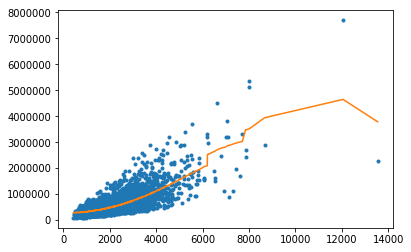

In [73]:
poly15_s1=polynomial_dataframe(s1['sqft_living'],15)
feat_s1=poly15_s1.columns
poly15_s1['price']=s1['price']
s1_15=linear_model.LinearRegression()
s1_15.fit(poly15_s1[feat_s1],poly15_s1[['price']])
s1_15.predict(poly15_s1[feat_s1].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_s1['pwr_1'],poly15_s1['price'],'.',
poly15_s1[['pwr_1']], s1_15.predict(poly15_s1[feat]),'-')

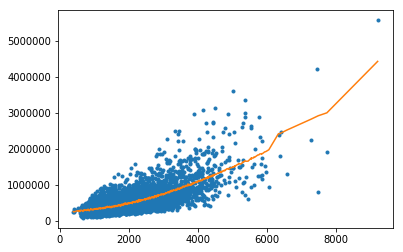

In [74]:
poly15_s2=polynomial_dataframe(s2['sqft_living'],15)
feat_s2=poly15_s2.columns
poly15_s2['price']=s2['price']
s2_15=linear_model.LinearRegression()
s2_15.fit(poly15_s2[feat_s2],poly15_s2[['price']])
s2_15.predict(poly15_s2[feat_s2].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_s2['pwr_1'],poly15_s2['price'],'.',
poly15_s2[['pwr_1']], s2_15.predict(poly15_s2[feat]),'-')

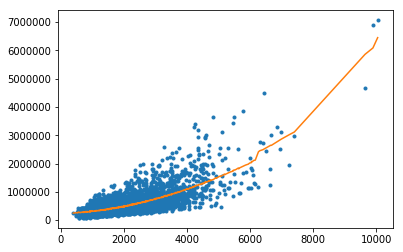

In [75]:
poly15_s3=polynomial_dataframe(s3['sqft_living'],15)
feat_s3=poly15_s3.columns
poly15_s3['price']=s3['price']
s3_15=linear_model.LinearRegression()
s3_15.fit(poly15_s3[feat_s3],poly15_s3[['price']])
s3_15.predict(poly15_s3[feat_s3].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_s3['pwr_1'],poly15_s3['price'],'.',
poly15_s3[['pwr_1']], s3_15.predict(poly15_s3[feat]),'-')

[[ 2.93422812e-05  5.48180516e-02 -1.45630690e-06  7.50384180e-11
   3.46787483e-14 -1.22042702e-15 -4.00215572e-16  8.87069765e-16
  -5.00778775e-16 -5.47655508e-16  2.64487335e-16  3.99526440e-16
   2.77830131e-16 -1.03567811e-15 -3.29425441e-16]]
[[ 3.05847022e-05  6.77183678e-02 -5.34542895e-06  4.61146897e-10
  -1.32080312e-14 -1.51478934e-16 -3.56165454e-16  5.67878299e-16
   4.45950228e-16  5.32289537e-16 -2.21732528e-16  1.14150671e-15
   6.29063307e-16  3.25275130e-16 -2.56122746e-16]]


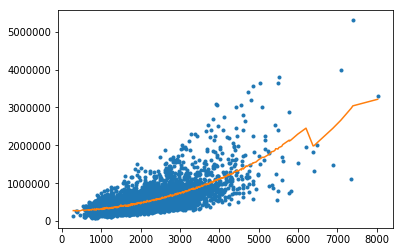

In [116]:
poly15_s4=polynomial_dataframe(s4['sqft_living'],15)
feat_s4=poly15_s4.columns
poly15_s4['price']=s4['price']
s4_15=linear_model.LinearRegression()
s4_15.fit(poly15_s4[feat_s4],poly15_s4[['price']])
s4_15.predict(poly15_s1[feat_s1].values)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly15_s4['pwr_1'],poly15_s4['price'],'.',
poly15_s4[['pwr_1']], s4_15.predict(poly15_s4[feat]),'-')
print (s4_15.coef_)
print (s3_15.coef_)

In [117]:
train=pd.read_csv('wk3_kc_house_train_data.csv')
test=pd.read_csv('wk3_kc_house_test_data.csv')
valid=pd.read_csv('wk3_kc_house_valid_data.csv')

In [159]:
def degree(train,valid,i):
    data=polynomial_dataframe(train['sqft_living'],i)
    val=polynomial_dataframe(valid['sqft_living'],i)
    feat=data.columns
    fev=val.columns
    data['price']=train['price']
    val['price']=valid['price']
    model=linear_model.LinearRegression()
    model.fit(data[feat],data[['price']])
    rss=((model.predict(val[fev])-valid[['price']])**2).sum()
    return rss
a=[]
for i in range(2,16):
    a.append(degree(train,valid,i))
a

[price    6.239551e+14
 dtype: float64, price    6.258203e+14
 dtype: float64, price    6.299873e+14
 dtype: float64, price    6.233736e+14
 dtype: float64, price    6.232524e+14
 dtype: float64, price    6.231638e+14
 dtype: float64, price    6.234076e+14
 dtype: float64, price    6.233230e+14
 dtype: float64, price    6.233805e+14
 dtype: float64, price    6.235441e+14
 dtype: float64, price    6.233597e+14
 dtype: float64, price    6.232972e+14
 dtype: float64, price    6.232283e+14
 dtype: float64, price    6.234186e+14
 dtype: float64]

The dataset must be wrong


In [120]:
poly_test=polynomial_dataframe(test['sqft_living'],7)
feat_test=poly_test.columns
poly_test['price']=test['price']
a=((model_7.predict(poly_test[feat_test])-poly_test[['price']])**2).sum()
a

price    1.367593e+14
dtype: float64

In [144]:
t2=polynomial_dataframe(train['sqft_living'],2)
feat2=t2.columns
t2[feat2]

,pwr_1,2
0,1960,3841600
1,5420,29376400
2,1160,1345600
3,1430,2044900
4,1370,1876900
5,2950,8702500
6,1600,2560000
7,1620,2624400
8,2270,5152900
9,1070,1144900


In [154]:
t2['price']=train['price']
((model_2.predict(t2[feat2])-t2[['price']])**2).sum()

price    6.176814e+14
dtype: float64

In [148]:
t2['price']

0        604000.0
1       1225000.0
2        468000.0
3        310000.0
4        400000.0
5        650000.0
6        485000.0
7        385000.0
8        285000.0
9        252700.0
10       329000.0
11       233000.0
12       937000.0
13       438000.0
14       322500.0
15       605000.0
16       861990.0
17       309000.0
18       488000.0
19       210490.0
20       785000.0
21      1350000.0
22       228000.0
23       345000.0
24       600000.0
25       650000.0
26       289000.0
27       975000.0
28       204000.0
29      1325000.0
          ...    
9731     579950.0
9732    1700000.0
9733     329000.0
9734     330000.0
9735     785000.0
9736    3567000.0
9737     579000.0
9738     645000.0
9739     594866.0
9740     625000.0
9741     399950.0
9742     380000.0
9743     505000.0
9744     385000.0
9745    1222500.0
9746     572000.0
9747     475000.0
9748    1088000.0
9749     350000.0
9750     520000.0
9751     679950.0
9752    1575000.0
9753     541800.0
9754    1537000.0
9755     5